['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


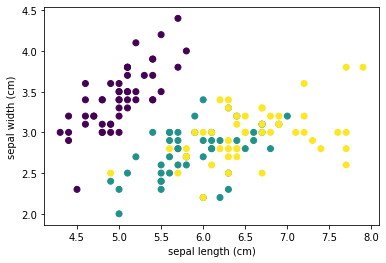

In [9]:
# Импортируем библиотеки
from sklearn import datasets
import matplotlib.pyplot as plt

# Загружаем набор данных
iris_df = datasets.load_iris()

# Методы, доступные для набора данных
print(dir(iris_df))

# Признаки
print(iris_df.feature_names)

# Метки
print(iris_df.target)

# Имена меток
print(iris_df.target_names)

# Разделение набора данных
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 1]  # Sepal Width

# Построение
plt.xlabel(iris_df.feature_names[0])
plt.ylabel(iris_df.feature_names[1])
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()


In [7]:
# Метод k-средних
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans

# Загружаем набор данных
iris_df = datasets.load_iris()

# Описываем модель
model = KMeans(n_clusters=3)

# Проводим моделирование
model.fit(iris_df.data)

# Предсказание на единичном примере
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Предсказание на всем наборе данных
all_predictions = model.predict(iris_df.data)

# Выводим предсказания
print(predicted_label)
print(all_predictions)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


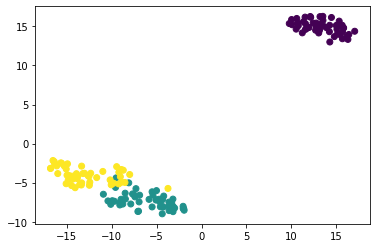

In [8]:
# Понижение размерности с методом t-SNE
# Импорт библиотек
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Загрузка датасета
iris_df = datasets.load_iris()

# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(iris_df.data)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()


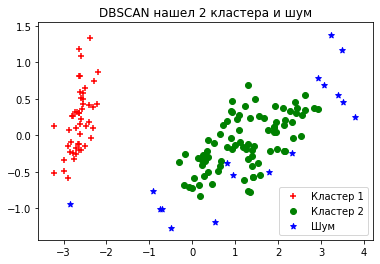

In [5]:
# Импортируем библиотеки
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Загружаем датасет
iris = load_iris()

# Определяем модель
dbscan = DBSCAN()

# Обучаем
dbscan.fit(iris.data)

# Уменьшаем размерность при помощи метода главных компонент
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# Строим в соответствии с тремя классами
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Шум'])
plt.title('DBSCAN нашел 2 кластера и шум')
plt.show()

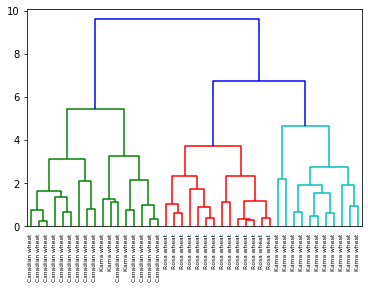

In [6]:
# Иерархическая кластеризация
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Создаем датафрейм
seeds_df = pd.read_csv(
"http://qps.ru/jNZUT")

# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
varieties = list(seeds_df.pop('grain_variety'))

# Извлекаем измерения как массив NumPy
samples = seeds_df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()